In [1]:
import sys, os
sys.path.append('..')

from dataset import load_data
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import utils
from utils import eval_model, visualize_model, train_model
import models
import torchvision.models as models
import train as t
import const
import matplotlib.pyplot as plt

print(torch.cuda.get_device_name(0))

%load_ext autoreload
%autoreload 2

use_gpu = torch.cuda.is_available()
if use_gpu:
    device = torch.device('cuda')
    print ("using CUDA")
else:
    device = torch.device('cpu')
    
print(use_gpu)

Tesla K80
using CUDA
True


In [2]:
train_data, val_data, test_data = load_data()

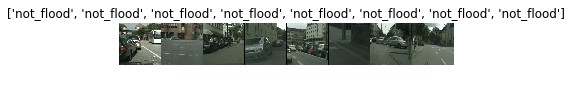

In [3]:
inputs, classes = next(iter(train_data))
utils.show_databatch(inputs, classes)

In [4]:
# load in vgg16 model
if 'heidi' in os.getcwd():
    vgg16 = models.vgg16()
    vgg16.load_state_dict(torch.load("C:/Users/heidi/.torch/models/vgg16-397923af.pth"))
else:
    vgg16 = models.vgg16(pretrained=True)
    
print(vgg16.classifier[6].out_features) # 1000 

if torch.cuda.device_count() > 1:
    print("using multiple gpus")
    vgg16 = nn.DataParallel(vgg16)

# Freeze training for all layers
for param in vgg16.features.parameters():
    param.require_grad = False

# Newly created modules have require_grad=True by default
num_features = vgg16.classifier[6].in_features
features = list(vgg16.classifier.children())[:-1] # Remove last layer
features.extend([nn.Linear(num_features, len(const.CLASS_NAMES))]) # Add our layer with 4 outputs
vgg16.classifier = nn.Sequential(*features) # Replace the model classifier
print(vgg16)

1000
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): C

In [16]:
if use_gpu:
    vgg16.cuda() #.cuda() will move everything to the GPU side
    
criterion = nn.CrossEntropyLoss().cuda()

optimizer_ft = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)
# optimizer_ft = optim.Adam(vgg16.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [17]:
print("Test before training")
eval_model(vgg16, test_data, criterion)

Test before training
Evaluating model
----------













0it [00:00, ?it/s]

Test batch 0/218












1it [00:02,  2.21s/it]










2it [00:02,  1.61s/it]










3it [00:02,  1.19s/it]










4it [00:02,  1.12it/s]










5it [00:03,  1.28it/s]










6it [00:03,  1.64it/s]










7it [00:03,  2.06it/s]










8it [00:03,  2.51it/s]










9it [00:04,  1.73it/s]










10it [00:05,  2.05it/s]










11it [00:05,  2.49it/s]










12it [00:05,  2.92it/s]










13it [00:06,  1.85it/s]










14it [00:06,  2.28it/s]










15it [00:07,  2.74it/s]










16it [00:07,  3.17it/s]










17it [00:07,  2.37it/s]










18it [00:08,  2.79it/s]










19it [00:08,  3.19it/s]










20it [00:08,  3.59it/s]










21it [00:08,  3.69it/s]










22it [00:10,  1.66it/s]










23it [00:10,  2.08it/s]










24it [00:10,  2.51it/s]










25it [00:10,  2.93it/s]










26it [00:11,  1.80it/s]










27it [00:12,  2.22it/s]










28it [00:12,  2.62it/s]










29it [00:12,  3.10it/s]










30it [00:13,

Test batch 100/218












101it [00:39,  2.09it/s]










102it [00:39,  2.57it/s]










103it [00:39,  3.03it/s]










104it [00:39,  3.50it/s]










105it [00:40,  2.19it/s]










106it [00:40,  2.65it/s]










107it [00:41,  3.12it/s]










108it [00:41,  3.49it/s]










109it [00:42,  2.26it/s]










110it [00:42,  2.57it/s]










111it [00:42,  3.06it/s]










112it [00:42,  3.49it/s]










113it [00:43,  1.71it/s]










114it [00:44,  2.12it/s]










115it [00:44,  2.58it/s]










116it [00:44,  3.01it/s]










117it [00:45,  2.30it/s]










118it [00:45,  2.38it/s]










119it [00:45,  2.83it/s]










120it [00:46,  3.29it/s]










121it [00:46,  2.48it/s]










122it [00:47,  2.30it/s]










123it [00:47,  2.75it/s]










124it [00:47,  3.20it/s]










125it [00:47,  3.03it/s]










126it [00:48,  2.35it/s]










127it [00:48,  2.80it/s]










128it [00:48,  3.25it/s]










129it [00

Test batch 200/218












201it [01:17,  2.64it/s]










202it [01:18,  3.03it/s]










203it [01:18,  1.95it/s]










204it [01:19,  2.38it/s]










205it [01:19,  2.78it/s]










206it [01:19,  3.20it/s]










207it [01:20,  2.48it/s]










208it [01:20,  2.94it/s]










209it [01:20,  3.35it/s]










210it [01:20,  3.77it/s]










211it [01:21,  2.54it/s]










212it [01:21,  2.98it/s]










213it [01:21,  3.42it/s]










214it [01:22,  3.80it/s]










215it [01:22,  3.60it/s]










216it [01:22,  4.04it/s]










217it [01:22,  4.41it/s]










218it [01:22,  5.09it/s]


Evaluation completed in 1m 25s
Avg loss (test): 0.0830
Avg acc (test): 0.6458
----------













0it [00:00, ?it/s]

Ground truth:


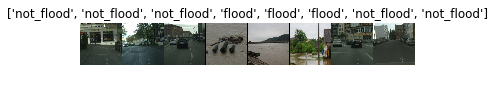

Prediction:


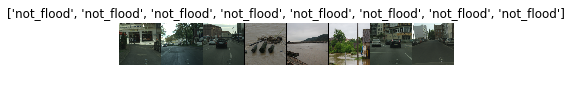

In [18]:
visualize_model(vgg16, test_data) 

In [19]:
vgg16_trained, loss_hist, train_acc_hist, val_acc_hist = train_model(train_data, val_data, vgg16, criterion, optimizer_ft, exp_lr_scheduler, 10)
print (vgg16_trained)
torch.save(vgg16_trained.state_dict(), 'vgg16_trained_sgd.pt')

Epoch 1/10
----------














0it [00:00, ?it/s]

Training batch 0/327.0













1it [00:01,  1.39s/it]











2it [00:01,  1.13s/it]











3it [00:02,  1.06it/s]











4it [00:02,  1.24it/s]











5it [00:03,  1.40it/s]











6it [00:03,  1.54it/s]











7it [00:04,  1.65it/s]











8it [00:04,  1.75it/s]











9it [00:05,  1.83it/s]











10it [00:05,  1.86it/s]











11it [00:06,  1.89it/s]











12it [00:06,  1.93it/s]











13it [00:07,  1.96it/s]











14it [00:07,  1.96it/s]











15it [00:08,  1.99it/s]











16it [00:08,  1.99it/s]











17it [00:09,  2.01it/s]











18it [00:09,  1.99it/s]











19it [00:10,  2.00it/s]











20it [00:10,  2.02it/s]











21it [00:11,  2.01it/s]











22it [00:11,  2.02it/s]











23it [00:12,  2.02it/s]











24it [00:12,  2.02it/s]











25it [00:13,  2.02it/s]











26it [00:13,  2.01it/s]











27it [00:14,  1.98it/s]











28it [00:14,  2.01it/s]











29it [00:15,  2.0

Training batch 100/327.0













101it [00:50,  2.01it/s]











102it [00:51,  1.99it/s]











103it [00:51,  2.01it/s]











104it [00:52,  2.01it/s]











105it [00:52,  2.01it/s]











106it [00:53,  1.99it/s]











107it [00:53,  2.00it/s]











108it [00:54,  2.01it/s]











109it [00:54,  2.01it/s]











110it [00:55,  2.01it/s]











111it [00:55,  2.01it/s]











112it [00:56,  2.02it/s]











113it [00:56,  2.00it/s]











114it [00:57,  2.00it/s]











115it [00:57,  2.02it/s]











116it [00:58,  2.03it/s]











117it [00:58,  2.05it/s]











118it [00:59,  2.05it/s]











119it [00:59,  2.05it/s]











120it [01:00,  2.04it/s]











121it [01:00,  2.05it/s]











122it [01:01,  2.02it/s]











123it [01:01,  2.02it/s]











124it [01:02,  2.03it/s]











125it [01:02,  2.04it/s]











126it [01:03,  2.05it/s]











127it [01:03,  2.05it/s]











128it [01:04,  2

Training batch 200/327.0













201it [01:40,  2.00it/s]











202it [01:40,  1.99it/s]











203it [01:41,  1.97it/s]











204it [01:41,  1.97it/s]











205it [01:42,  1.98it/s]











206it [01:42,  1.98it/s]











207it [01:43,  1.98it/s]











208it [01:43,  2.00it/s]











209it [01:44,  2.01it/s]











210it [01:44,  2.01it/s]











211it [01:45,  2.01it/s]











212it [01:45,  2.02it/s]











213it [01:46,  2.03it/s]











214it [01:46,  2.03it/s]











215it [01:47,  2.01it/s]











216it [01:47,  2.03it/s]











217it [01:48,  2.02it/s]











218it [01:48,  2.03it/s]











219it [01:49,  2.03it/s]











220it [01:49,  2.03it/s]











221it [01:50,  2.02it/s]











222it [01:50,  2.02it/s]











223it [01:51,  2.03it/s]











224it [01:51,  2.01it/s]











225it [01:52,  2.00it/s]











226it [01:52,  1.99it/s]











227it [01:53,  1.97it/s]











228it [01:53,  1

Training batch 300/327.0













301it [02:30,  2.01it/s]











302it [02:30,  2.03it/s]











303it [02:30,  2.03it/s]











304it [02:31,  2.03it/s]











305it [02:31,  2.03it/s]











306it [02:32,  2.04it/s]











307it [02:32,  2.04it/s]











308it [02:33,  2.05it/s]











309it [02:33,  2.02it/s]











310it [02:34,  2.03it/s]











311it [02:34,  2.02it/s]











312it [02:35,  2.03it/s]











313it [02:35,  2.00it/s]











314it [02:36,  2.00it/s]











315it [02:36,  2.00it/s]











316it [02:37,  2.01it/s]











317it [02:37,  2.03it/s]











318it [02:38,  2.03it/s]











319it [02:38,  2.03it/s]











320it [02:39,  2.02it/s]











321it [02:39,  2.02it/s]











322it [02:40,  2.01it/s]











323it [02:40,  2.03it/s]











324it [02:41,  2.03it/s]











325it [02:41,  2.03it/s]











326it [02:42,  2.04it/s]











327it [02:42,  2.03it/s]


tensor(1628, device='cuda:0')
Validation batch 200/218
Epoch 1 result: 
Avg loss (train): 0.0835
Avg acc (train): 0.6230
Avg loss (val): 0.0817
Avg acc (val): 0.6418
----------

Epoch 2/10
----------















0it [00:00, ?it/s]

Training batch 0/327.0














1it [00:01,  1.58s/it]












2it [00:02,  1.26s/it]












3it [00:02,  1.04s/it]












4it [00:03,  1.14it/s]












5it [00:03,  1.30it/s]












6it [00:04,  1.44it/s]












7it [00:04,  1.57it/s]












8it [00:05,  1.68it/s]












9it [00:05,  1.74it/s]












10it [00:06,  1.80it/s]












11it [00:06,  1.85it/s]












12it [00:07,  1.90it/s]












13it [00:07,  1.92it/s]












14it [00:08,  1.94it/s]












15it [00:08,  1.96it/s]












16it [00:09,  1.98it/s]












17it [00:09,  1.99it/s]












18it [00:10,  1.96it/s]












19it [00:10,  1.98it/s]












20it [00:11,  1.98it/s]












21it [00:11,  2.00it/s]












22it [00:12,  2.00it/s]












23it [00:12,  1.98it/s]












24it [00:13,  1.98it/s]












25it [00:13,  1.98it/s]












26it [00:14,  1.98it/s]












27it [00:14,  1.98it/s]












28it [00:15,  1.99it/s]


Training batch 100/327.0














101it [00:51,  1.99it/s]












102it [00:52,  1.99it/s]












103it [00:52,  1.98it/s]












104it [00:53,  1.99it/s]












105it [00:53,  1.98it/s]












106it [00:54,  1.99it/s]












107it [00:54,  1.99it/s]












108it [00:55,  1.98it/s]












109it [00:55,  2.00it/s]












110it [00:56,  2.01it/s]












111it [00:56,  2.00it/s]












112it [00:57,  2.00it/s]












113it [00:57,  1.98it/s]












114it [00:58,  1.99it/s]












115it [00:58,  2.00it/s]












116it [00:59,  2.01it/s]












117it [00:59,  2.01it/s]












118it [01:00,  2.02it/s]












119it [01:00,  2.03it/s]












120it [01:01,  2.02it/s]












121it [01:01,  2.04it/s]












122it [01:02,  2.04it/s]












123it [01:02,  2.02it/s]












124it [01:03,  2.02it/s]












125it [01:03,  2.00it/s]












126it [01:04,  2.01it/s]












127it [01:04,  2.01it/s]


Training batch 200/327.0














201it [01:41,  2.03it/s]












202it [01:42,  2.02it/s]












203it [01:42,  1.99it/s]












204it [01:43,  2.01it/s]












205it [01:43,  2.02it/s]












206it [01:44,  2.02it/s]












207it [01:44,  2.00it/s]












208it [01:45,  2.00it/s]












209it [01:45,  2.01it/s]












210it [01:46,  2.00it/s]












211it [01:46,  1.99it/s]












212it [01:47,  1.99it/s]












213it [01:47,  2.00it/s]












214it [01:48,  2.00it/s]












215it [01:48,  1.98it/s]












216it [01:49,  1.99it/s]












217it [01:49,  1.96it/s]












218it [01:50,  1.97it/s]












219it [01:50,  1.97it/s]












220it [01:51,  1.96it/s]












221it [01:51,  1.96it/s]












222it [01:52,  1.98it/s]












223it [01:52,  1.98it/s]












224it [01:53,  1.98it/s]












225it [01:53,  1.99it/s]












226it [01:54,  2.00it/s]












227it [01:54,  2.01it/s]


Training batch 300/327.0














301it [02:31,  2.00it/s]












302it [02:32,  2.01it/s]












303it [02:32,  2.02it/s]












304it [02:33,  2.02it/s]












305it [02:33,  2.03it/s]












306it [02:34,  2.04it/s]












307it [02:34,  2.02it/s]












308it [02:35,  2.03it/s]












309it [02:35,  2.01it/s]












310it [02:36,  2.02it/s]












311it [02:36,  2.00it/s]












312it [02:37,  1.99it/s]












313it [02:37,  2.01it/s]












314it [02:38,  2.01it/s]












315it [02:38,  2.02it/s]












316it [02:39,  2.01it/s]












317it [02:39,  2.01it/s]












318it [02:40,  2.01it/s]












319it [02:40,  2.00it/s]












320it [02:41,  1.99it/s]












321it [02:41,  1.97it/s]












322it [02:42,  1.97it/s]












323it [02:42,  1.98it/s]












324it [02:43,  1.97it/s]












325it [02:43,  1.99it/s]












326it [02:44,  2.01it/s]












327it [02:44,  1.99it/s]


tensor(1640, device='cuda:0')
Validation batch 200/218
Epoch 2 result: 
Avg loss (train): 0.0832
Avg acc (train): 0.6276
Avg loss (val): 0.0826
Avg acc (val): 0.6418
----------

Epoch 3/10
----------
















0it [00:00, ?it/s]

Training batch 0/327.0















1it [00:01,  1.90s/it]













2it [00:02,  1.50s/it]













3it [00:02,  1.20s/it]













4it [00:03,  1.01it/s]













5it [00:03,  1.19it/s]













6it [00:04,  1.34it/s]













7it [00:04,  1.48it/s]













8it [00:05,  1.61it/s]













9it [00:06,  1.69it/s]













10it [00:06,  1.77it/s]













11it [00:07,  1.83it/s]













12it [00:07,  1.86it/s]













13it [00:08,  1.88it/s]













14it [00:08,  1.91it/s]













15it [00:09,  1.91it/s]













16it [00:09,  1.94it/s]













17it [00:10,  1.96it/s]













18it [00:10,  1.95it/s]













19it [00:11,  1.97it/s]













20it [00:11,  1.97it/s]













21it [00:12,  1.99it/s]













22it [00:12,  1.99it/s]













23it [00:13,  1.97it/s]













24it [00:13,  1.99it/s]













25it [00:14,  1.99it/s]













26it [00:14,  1.99it/s]













27it [00:15,  1.98it/s]











Training batch 100/327.0















101it [00:52,  2.02it/s]













102it [00:52,  2.01it/s]













103it [00:53,  2.02it/s]













104it [00:53,  2.02it/s]













105it [00:54,  2.01it/s]













106it [00:54,  2.02it/s]













107it [00:55,  2.01it/s]













108it [00:55,  2.01it/s]













109it [00:56,  2.01it/s]













110it [00:56,  2.00it/s]













111it [00:57,  2.01it/s]













112it [00:57,  2.00it/s]













113it [00:58,  1.97it/s]













114it [00:58,  1.98it/s]













115it [00:59,  1.99it/s]













116it [00:59,  2.01it/s]













117it [01:00,  2.00it/s]













118it [01:00,  2.00it/s]













119it [01:01,  1.99it/s]













120it [01:01,  1.99it/s]













121it [01:02,  1.97it/s]













122it [01:02,  1.99it/s]













123it [01:03,  2.00it/s]













124it [01:03,  2.02it/s]













125it [01:04,  2.02it/s]













126it [01:04,  2.02it/s]













Training batch 200/327.0















201it [01:42,  1.98it/s]













202it [01:42,  1.98it/s]













203it [01:43,  2.01it/s]













204it [01:43,  2.02it/s]













205it [01:44,  2.00it/s]













206it [01:44,  2.00it/s]













207it [01:45,  2.01it/s]













208it [01:45,  2.02it/s]













209it [01:46,  2.02it/s]













210it [01:46,  2.04it/s]













211it [01:46,  2.04it/s]













212it [01:47,  2.05it/s]













213it [01:47,  2.05it/s]













214it [01:48,  2.04it/s]













215it [01:48,  2.03it/s]













216it [01:49,  2.01it/s]













217it [01:49,  2.01it/s]













218it [01:50,  1.99it/s]













219it [01:50,  1.98it/s]













220it [01:51,  2.00it/s]













221it [01:51,  1.99it/s]













222it [01:52,  2.01it/s]













223it [01:52,  2.01it/s]













224it [01:53,  2.00it/s]













225it [01:53,  2.01it/s]













226it [01:54,  2.00it/s]













Training batch 300/327.0















301it [02:32,  2.01it/s]













302it [02:32,  2.00it/s]













303it [02:33,  2.01it/s]













304it [02:33,  2.00it/s]













305it [02:34,  1.99it/s]













306it [02:34,  2.00it/s]













307it [02:35,  2.01it/s]













308it [02:35,  1.99it/s]













309it [02:36,  2.00it/s]













310it [02:36,  2.01it/s]













311it [02:37,  2.01it/s]













312it [02:37,  2.00it/s]













313it [02:38,  1.99it/s]













314it [02:38,  1.98it/s]













315it [02:39,  1.97it/s]













316it [02:39,  1.97it/s]













317it [02:40,  1.98it/s]













318it [02:40,  1.98it/s]













319it [02:41,  1.95it/s]













320it [02:41,  1.97it/s]













321it [02:42,  1.98it/s]













322it [02:42,  1.99it/s]













323it [02:43,  2.00it/s]













324it [02:43,  2.00it/s]













325it [02:44,  2.01it/s]













326it [02:44,  2.01it/s]














tensor(1642, device='cuda:0')
Validation batch 200/218
Epoch 3 result: 
Avg loss (train): 0.0833
Avg acc (train): 0.6284
Avg loss (val): 0.0822
Avg acc (val): 0.6418
----------

Epoch 4/10
----------

















0it [00:00, ?it/s]

Training batch 0/327.0
















1it [00:02,  2.01s/it]














2it [00:02,  1.56s/it]














3it [00:03,  1.24s/it]














4it [00:03,  1.03s/it]














5it [00:04,  1.11it/s]














6it [00:04,  1.27it/s]














7it [00:05,  1.42it/s]














8it [00:05,  1.55it/s]














9it [00:06,  1.64it/s]














10it [00:06,  1.74it/s]














11it [00:07,  1.81it/s]














12it [00:07,  1.87it/s]














13it [00:08,  1.91it/s]














14it [00:08,  1.95it/s]














15it [00:09,  1.97it/s]














16it [00:09,  1.99it/s]














17it [00:10,  2.00it/s]














18it [00:10,  2.03it/s]














19it [00:11,  2.01it/s]














20it [00:11,  2.00it/s]














21it [00:12,  2.00it/s]














22it [00:12,  1.99it/s]














23it [00:13,  2.00it/s]














24it [00:13,  1.98it/s]














25it [00:14,  1.96it/s]














26it [00:14,  1.98it/s]














27it [

99it [00:51,  2.01it/s]














100it [00:51,  2.01it/s]

Training batch 100/327.0
















101it [00:52,  1.99it/s]














102it [00:52,  1.99it/s]














103it [00:53,  2.00it/s]














104it [00:53,  1.99it/s]














105it [00:54,  1.99it/s]














106it [00:54,  1.99it/s]














107it [00:55,  1.99it/s]














108it [00:55,  1.98it/s]














109it [00:56,  1.98it/s]














110it [00:56,  1.99it/s]














111it [00:57,  1.97it/s]














112it [00:57,  1.98it/s]














113it [00:58,  1.96it/s]














114it [00:58,  1.95it/s]














115it [00:59,  1.95it/s]














116it [00:59,  1.97it/s]














117it [01:00,  1.98it/s]














118it [01:00,  1.99it/s]














119it [01:01,  1.98it/s]














120it [01:01,  1.98it/s]














121it [01:02,  1.95it/s]














122it [01:02,  1.94it/s]














123it [01:03,  1.97it/s]














124it [01:03,  1.99it/s]














125it [01:04,  2.01it/s]














126it [01:

198it [01:41,  2.00it/s]














199it [01:41,  1.99it/s]














200it [01:42,  2.00it/s]

Training batch 200/327.0
















201it [01:42,  1.99it/s]














202it [01:43,  2.00it/s]














203it [01:43,  1.99it/s]














204it [01:44,  2.01it/s]














205it [01:44,  1.99it/s]














206it [01:45,  1.99it/s]














207it [01:45,  1.99it/s]














208it [01:46,  1.99it/s]














209it [01:46,  1.98it/s]














210it [01:47,  1.98it/s]














211it [01:47,  2.00it/s]














212it [01:48,  2.01it/s]














213it [01:48,  2.02it/s]














214it [01:49,  2.03it/s]














215it [01:49,  2.01it/s]














216it [01:50,  2.02it/s]














217it [01:50,  1.98it/s]














218it [01:51,  1.96it/s]














219it [01:51,  1.99it/s]














220it [01:52,  2.01it/s]














221it [01:52,  2.00it/s]














222it [01:53,  2.00it/s]














223it [01:53,  2.00it/s]














224it [01:54,  1.97it/s]














225it [01:54,  1.99it/s]














226it [01:

298it [02:31,  2.00it/s]














299it [02:31,  2.01it/s]














300it [02:32,  2.00it/s]

Training batch 300/327.0
















301it [02:32,  2.00it/s]














302it [02:33,  2.00it/s]














303it [02:33,  2.00it/s]














304it [02:34,  1.99it/s]














305it [02:34,  1.98it/s]














306it [02:35,  2.00it/s]














307it [02:35,  2.01it/s]














308it [02:36,  2.02it/s]














309it [02:36,  2.02it/s]














310it [02:37,  2.01it/s]














311it [02:37,  2.01it/s]














312it [02:38,  1.99it/s]














313it [02:38,  2.01it/s]














314it [02:39,  1.99it/s]














315it [02:39,  2.00it/s]














316it [02:40,  2.00it/s]














317it [02:40,  2.00it/s]














318it [02:41,  2.00it/s]














319it [02:41,  1.98it/s]














320it [02:42,  1.99it/s]














321it [02:42,  2.01it/s]














322it [02:43,  1.99it/s]














323it [02:43,  2.00it/s]














324it [02:44,  1.98it/s]














325it [02:44,  1.98it/s]














326it [02:


tensor(1698, device='cuda:0')
Validation batch 200/218
Epoch 4 result: 
Avg loss (train): 0.0821
Avg acc (train): 0.6498
Avg loss (val): 0.0816
Avg acc (val): 0.6418
----------

Epoch 5/10
----------


















0it [00:00, ?it/s]

Training batch 0/327.0

















1it [00:01,  1.84s/it]















2it [00:02,  1.49s/it]















3it [00:03,  1.19s/it]















4it [00:03,  1.02it/s]















5it [00:03,  1.20it/s]















6it [00:04,  1.36it/s]















7it [00:05,  1.49it/s]















8it [00:05,  1.62it/s]















9it [00:06,  1.68it/s]















10it [00:06,  1.73it/s]















11it [00:07,  1.81it/s]















12it [00:07,  1.87it/s]















13it [00:08,  1.88it/s]















14it [00:08,  1.88it/s]















15it [00:09,  1.92it/s]















16it [00:09,  1.95it/s]















17it [00:10,  1.95it/s]















18it [00:10,  1.96it/s]















19it [00:11,  1.98it/s]















20it [00:11,  1.98it/s]















21it [00:12,  1.93it/s]















22it [00:12,  1.94it/s]















23it [00:13,  1.95it/s]















24it [00:13,  1.96it/s]















25it [00:14,  1.94it/s]















26it [00:14,  1.96

95it [00:49,  1.96it/s]















96it [00:49,  1.97it/s]















97it [00:50,  1.99it/s]















98it [00:50,  1.96it/s]















99it [00:51,  1.96it/s]















100it [00:51,  1.96it/s]

Training batch 100/327.0

















101it [00:52,  1.96it/s]















102it [00:53,  1.95it/s]















103it [00:53,  1.95it/s]















104it [00:54,  1.98it/s]















105it [00:54,  1.97it/s]















106it [00:55,  1.99it/s]















107it [00:55,  1.97it/s]















108it [00:56,  1.97it/s]















109it [00:56,  1.99it/s]















110it [00:57,  1.98it/s]















111it [00:57,  1.97it/s]















112it [00:58,  1.98it/s]















113it [00:58,  1.99it/s]















114it [00:59,  2.01it/s]















115it [00:59,  2.01it/s]















116it [01:00,  2.02it/s]















117it [01:00,  2.02it/s]















118it [01:00,  2.03it/s]















119it [01:01,  2.02it/s]















120it [01:02,  2.00it/s]















121it [01:02,  1.98it/s]















122it [01:03,  1.98it/s]















123it [01:03,  2.01it/s]















124it [01:04,  2.01it/s]















125it [01:04,  2.00it/s]

194it [01:38,  1.97it/s]















195it [01:39,  1.96it/s]















196it [01:39,  1.99it/s]















197it [01:40,  1.97it/s]















198it [01:40,  1.99it/s]















199it [01:41,  2.02it/s]















200it [01:41,  2.02it/s]

Training batch 200/327.0

















201it [01:42,  2.00it/s]















202it [01:42,  1.99it/s]















203it [01:43,  1.98it/s]















204it [01:43,  1.99it/s]















205it [01:44,  1.99it/s]















206it [01:44,  1.99it/s]















207it [01:45,  1.97it/s]















208it [01:45,  2.00it/s]















209it [01:46,  1.99it/s]















210it [01:46,  1.99it/s]















211it [01:47,  1.99it/s]















212it [01:47,  1.98it/s]















213it [01:48,  1.98it/s]















214it [01:48,  1.99it/s]















215it [01:49,  2.00it/s]















216it [01:49,  2.00it/s]















217it [01:50,  2.00it/s]















218it [01:50,  1.99it/s]















219it [01:51,  1.99it/s]















220it [01:51,  2.00it/s]















221it [01:52,  2.00it/s]















222it [01:52,  2.01it/s]















223it [01:53,  2.00it/s]















224it [01:53,  2.00it/s]















225it [01:54,  1.99it/s]

294it [02:28,  1.99it/s]















295it [02:29,  1.95it/s]















296it [02:29,  1.97it/s]















297it [02:30,  1.99it/s]















298it [02:30,  2.00it/s]















299it [02:31,  2.01it/s]















300it [02:31,  2.00it/s]

Training batch 300/327.0

















301it [02:32,  2.00it/s]















302it [02:32,  2.01it/s]















303it [02:33,  2.00it/s]















304it [02:33,  2.00it/s]















305it [02:34,  2.00it/s]















306it [02:34,  2.02it/s]















307it [02:35,  2.02it/s]















308it [02:35,  1.99it/s]















309it [02:36,  1.99it/s]















310it [02:36,  1.99it/s]















311it [02:37,  1.98it/s]















312it [02:37,  1.99it/s]















313it [02:38,  1.99it/s]















314it [02:38,  1.99it/s]















315it [02:39,  1.98it/s]















316it [02:39,  2.00it/s]















317it [02:40,  1.98it/s]















318it [02:40,  2.00it/s]















319it [02:41,  2.00it/s]















320it [02:41,  2.03it/s]















321it [02:42,  2.01it/s]















322it [02:42,  1.96it/s]















323it [02:43,  1.99it/s]















324it [02:43,  2.01it/s]















325it [02:44,  2.01it/s]


tensor(1674, device='cuda:0')
Validation batch 200/218
Epoch 5 result: 
Avg loss (train): 0.0818
Avg acc (train): 0.6406
Avg loss (val): 0.0818
Avg acc (val): 0.6418
----------

Epoch 6/10
----------



















0it [00:00, ?it/s]

Training batch 0/327.0


















1it [00:01,  1.91s/it]
















2it [00:02,  1.54s/it]
















3it [00:03,  1.23s/it]
















4it [00:03,  1.01s/it]
















5it [00:04,  1.17it/s]
















6it [00:04,  1.33it/s]
















7it [00:05,  1.48it/s]
















8it [00:05,  1.60it/s]
















9it [00:06,  1.68it/s]
















10it [00:06,  1.78it/s]
















11it [00:07,  1.82it/s]
















12it [00:07,  1.87it/s]
















13it [00:08,  1.88it/s]
















14it [00:08,  1.90it/s]
















15it [00:09,  1.94it/s]
















16it [00:09,  1.97it/s]
















17it [00:10,  1.96it/s]
















18it [00:10,  1.96it/s]
















19it [00:11,  1.98it/s]
















20it [00:11,  1.99it/s]
















21it [00:12,  2.00it/s]
















22it [00:12,  2.01it/s]
















23it [00:13,  1.99it/s]
















24it [00:13,  1.98it/s]
















25it [00:14,  1.99it/s]










91it [00:47,  2.00it/s]
















92it [00:47,  1.99it/s]
















93it [00:48,  2.00it/s]
















94it [00:48,  2.01it/s]
















95it [00:49,  2.01it/s]
















96it [00:49,  2.02it/s]
















97it [00:50,  2.01it/s]
















98it [00:50,  2.02it/s]
















99it [00:51,  2.04it/s]
















100it [00:51,  2.04it/s]

Training batch 100/327.0


















101it [00:52,  2.03it/s]
















102it [00:52,  2.03it/s]
















103it [00:53,  2.00it/s]
















104it [00:53,  1.99it/s]
















105it [00:54,  1.97it/s]
















106it [00:54,  1.98it/s]
















107it [00:55,  2.00it/s]
















108it [00:55,  1.99it/s]
















109it [00:56,  2.02it/s]
















110it [00:56,  1.99it/s]
















111it [00:57,  2.02it/s]
















112it [00:57,  2.02it/s]
















113it [00:58,  2.02it/s]
















114it [00:58,  2.03it/s]
















115it [00:59,  2.00it/s]
















116it [00:59,  2.00it/s]
















117it [01:00,  1.99it/s]
















118it [01:00,  2.00it/s]
















119it [01:01,  1.98it/s]
















120it [01:01,  1.99it/s]
















121it [01:02,  2.00it/s]
















122it [01:02,  2.01it/s]
















123it [01:03,  1.98it/s]
















124it [01:03,  2.00it/s]

















190it [01:36,  2.03it/s]
















191it [01:37,  2.03it/s]
















192it [01:37,  2.04it/s]
















193it [01:38,  2.02it/s]
















194it [01:38,  2.03it/s]
















195it [01:39,  2.03it/s]
















196it [01:39,  2.01it/s]
















197it [01:40,  2.02it/s]
















198it [01:40,  2.03it/s]
















199it [01:41,  2.04it/s]
















200it [01:41,  2.02it/s]

Training batch 200/327.0


















201it [01:42,  2.00it/s]
















202it [01:42,  1.99it/s]
















203it [01:43,  2.00it/s]
















204it [01:43,  2.00it/s]
















205it [01:44,  2.02it/s]
















206it [01:44,  1.97it/s]
















207it [01:45,  1.97it/s]
















208it [01:45,  1.99it/s]
















209it [01:46,  1.99it/s]
















210it [01:46,  2.01it/s]
















211it [01:47,  2.00it/s]
















212it [01:47,  1.99it/s]
















213it [01:48,  2.00it/s]
















214it [01:48,  2.02it/s]
















215it [01:49,  1.99it/s]
















216it [01:49,  2.01it/s]
















217it [01:50,  2.02it/s]
















218it [01:50,  2.03it/s]
















219it [01:51,  2.04it/s]
















220it [01:51,  2.04it/s]
















221it [01:52,  2.02it/s]
















222it [01:52,  2.03it/s]
















223it [01:53,  2.02it/s]
















224it [01:53,  2.01it/s]

















290it [02:26,  1.98it/s]
















291it [02:27,  1.98it/s]
















292it [02:27,  1.99it/s]
















293it [02:28,  2.00it/s]
















294it [02:28,  1.98it/s]
















295it [02:29,  1.96it/s]
















296it [02:29,  1.96it/s]
















297it [02:30,  1.96it/s]
















298it [02:30,  2.00it/s]
















299it [02:31,  2.00it/s]
















300it [02:31,  1.95it/s]

Training batch 300/327.0


















301it [02:32,  1.95it/s]
















302it [02:32,  1.98it/s]
















303it [02:33,  1.95it/s]
















304it [02:33,  1.99it/s]
















305it [02:34,  2.00it/s]
















306it [02:34,  2.00it/s]
















307it [02:35,  2.01it/s]
















308it [02:35,  1.99it/s]
















309it [02:36,  2.01it/s]
















310it [02:36,  2.00it/s]
















311it [02:37,  2.01it/s]
















312it [02:37,  2.03it/s]
















313it [02:38,  2.04it/s]
















314it [02:38,  2.02it/s]
















315it [02:39,  2.03it/s]
















316it [02:39,  2.02it/s]
















317it [02:40,  2.01it/s]
















318it [02:40,  2.02it/s]
















319it [02:41,  2.02it/s]
















320it [02:41,  1.99it/s]
















321it [02:42,  1.98it/s]
















322it [02:42,  2.01it/s]
















323it [02:43,  2.00it/s]
















324it [02:43,  1.99it/s]


















tensor(1640, device='cuda:0')
Validation batch 200/218
Epoch 6 result: 
Avg loss (train): 0.0833
Avg acc (train): 0.6276
Avg loss (val): 0.0819
Avg acc (val): 0.6418
----------

Epoch 7/10
----------




















0it [00:00, ?it/s]

Training batch 0/327.0



















1it [00:01,  1.47s/it]

















2it [00:02,  1.29s/it]

















3it [00:02,  1.05s/it]

















4it [00:03,  1.12it/s]

















5it [00:03,  1.29it/s]

















6it [00:04,  1.44it/s]

















7it [00:04,  1.58it/s]

















8it [00:05,  1.68it/s]

















9it [00:05,  1.75it/s]

















10it [00:06,  1.81it/s]

















11it [00:06,  1.86it/s]

















12it [00:07,  1.90it/s]

















13it [00:07,  1.91it/s]

















14it [00:08,  1.92it/s]

















15it [00:08,  1.94it/s]

















16it [00:09,  1.96it/s]

















17it [00:09,  1.96it/s]

















18it [00:10,  1.97it/s]

















19it [00:10,  1.99it/s]

















20it [00:11,  2.01it/s]

















21it [00:11,  2.01it/s]

















22it [00:12,  2.03it/s]

















23it [00:12,  2.03it/s]

















24it [00:13,  2.04it/s]

















25it [0

87it [00:45,  1.98it/s]

















88it [00:45,  1.95it/s]

















89it [00:46,  1.97it/s]

















90it [00:46,  1.99it/s]

















91it [00:47,  2.01it/s]

















92it [00:47,  2.02it/s]

















93it [00:48,  2.01it/s]

















94it [00:48,  2.00it/s]

















95it [00:49,  2.01it/s]

















96it [00:49,  2.01it/s]

















97it [00:50,  2.01it/s]

















98it [00:50,  2.00it/s]

















99it [00:51,  1.99it/s]

















100it [00:51,  1.97it/s]

Training batch 100/327.0



















101it [00:52,  1.97it/s]

















102it [00:52,  1.99it/s]

















103it [00:53,  1.98it/s]

















104it [00:53,  2.00it/s]

















105it [00:54,  2.00it/s]

















106it [00:54,  2.01it/s]

















107it [00:55,  2.02it/s]

















108it [00:55,  2.01it/s]

















109it [00:56,  2.00it/s]

















110it [00:56,  2.00it/s]

















111it [00:57,  2.01it/s]

















112it [00:57,  2.02it/s]

















113it [00:57,  2.03it/s]

















114it [00:58,  2.03it/s]

















115it [00:58,  2.04it/s]

















116it [00:59,  2.02it/s]

















117it [00:59,  2.00it/s]

















118it [01:00,  1.99it/s]

















119it [01:00,  2.00it/s]

















120it [01:01,  2.00it/s]

















121it [01:02,  1.97it/s]

















122it [01:02,  2.00it/s]

















123it [01:02,  2.01it/s]

















124it [01:03,  2

186it [01:34,  1.99it/s]

















187it [01:34,  1.98it/s]

















188it [01:35,  1.97it/s]

















189it [01:35,  1.96it/s]

















190it [01:36,  1.97it/s]

















191it [01:36,  1.97it/s]

















192it [01:37,  1.98it/s]

















193it [01:37,  1.97it/s]

















194it [01:38,  1.99it/s]

















195it [01:38,  1.98it/s]

















196it [01:39,  1.98it/s]

















197it [01:39,  1.97it/s]

















198it [01:40,  1.95it/s]

















199it [01:40,  1.94it/s]

















200it [01:41,  1.98it/s]

Training batch 200/327.0



















201it [01:41,  1.97it/s]

















202it [01:42,  1.98it/s]

















203it [01:42,  1.98it/s]

















204it [01:43,  1.98it/s]

















205it [01:43,  2.00it/s]

















206it [01:44,  2.02it/s]

















207it [01:44,  1.99it/s]

















208it [01:45,  1.97it/s]

















209it [01:45,  1.96it/s]

















210it [01:46,  1.98it/s]

















211it [01:46,  1.95it/s]

















212it [01:47,  1.95it/s]

















213it [01:47,  1.98it/s]

















214it [01:48,  2.01it/s]

















215it [01:48,  2.02it/s]

















216it [01:49,  2.03it/s]

















217it [01:49,  2.03it/s]

















218it [01:50,  2.03it/s]

















219it [01:50,  2.03it/s]

















220it [01:51,  2.00it/s]

















221it [01:51,  1.97it/s]

















222it [01:52,  1.98it/s]

















223it [01:52,  1.98it/s]

















224it [01:53,  1

286it [02:24,  2.01it/s]

















287it [02:25,  2.01it/s]

















288it [02:25,  2.00it/s]

















289it [02:26,  2.01it/s]

















290it [02:26,  2.02it/s]

















291it [02:27,  2.01it/s]

















292it [02:27,  2.03it/s]

















293it [02:28,  2.00it/s]

















294it [02:28,  2.02it/s]

















295it [02:29,  1.99it/s]

















296it [02:29,  1.98it/s]

















297it [02:30,  1.99it/s]

















298it [02:30,  2.01it/s]

















299it [02:31,  2.03it/s]

















300it [02:31,  2.03it/s]

Training batch 300/327.0



















301it [02:32,  2.03it/s]

















302it [02:32,  2.01it/s]

















303it [02:33,  2.00it/s]

















304it [02:33,  2.01it/s]

















305it [02:34,  2.02it/s]

















306it [02:34,  2.01it/s]

















307it [02:35,  2.00it/s]

















308it [02:35,  1.98it/s]

















309it [02:36,  2.00it/s]

















310it [02:36,  2.00it/s]

















311it [02:37,  2.01it/s]

















312it [02:37,  2.03it/s]

















313it [02:38,  1.99it/s]

















314it [02:38,  2.01it/s]

















315it [02:39,  2.01it/s]

















316it [02:39,  2.00it/s]

















317it [02:40,  1.98it/s]

















318it [02:40,  1.99it/s]

















319it [02:41,  2.01it/s]

















320it [02:41,  2.03it/s]

















321it [02:42,  2.03it/s]

















322it [02:42,  2.03it/s]

















323it [02:43,  2.01it/s]

















324it [02:43,  2


tensor(1653, device='cuda:0')
Validation batch 200/218
Epoch 7 result: 
Avg loss (train): 0.0828
Avg acc (train): 0.6326
Avg loss (val): 0.0818
Avg acc (val): 0.6418
----------

Epoch 8/10
----------





















0it [00:00, ?it/s]

Training batch 0/327.0




















1it [00:01,  1.89s/it]


















2it [00:02,  1.48s/it]


















3it [00:02,  1.18s/it]


















4it [00:03,  1.03it/s]


















5it [00:03,  1.20it/s]


















6it [00:04,  1.35it/s]


















7it [00:04,  1.51it/s]


















8it [00:05,  1.64it/s]


















9it [00:05,  1.74it/s]


















10it [00:06,  1.79it/s]


















11it [00:06,  1.87it/s]


















12it [00:07,  1.90it/s]


















13it [00:07,  1.92it/s]


















14it [00:08,  1.94it/s]


















15it [00:08,  1.95it/s]


















16it [00:09,  1.96it/s]


















17it [00:09,  1.96it/s]


















18it [00:10,  1.96it/s]


















19it [00:10,  1.96it/s]


















20it [00:11,  1.96it/s]


















21it [00:11,  1.97it/s]


















22it [00:12,  1.98it/s]


















23it [00:12,  2.00it/s]


















24it [00:13,  1.97it/s]


83it [00:42,  2.01it/s]


















84it [00:43,  1.99it/s]


















85it [00:43,  2.00it/s]


















86it [00:44,  2.02it/s]


















87it [00:44,  2.01it/s]


















88it [00:45,  2.03it/s]


















89it [00:45,  2.02it/s]


















90it [00:46,  2.00it/s]


















91it [00:46,  2.02it/s]


















92it [00:47,  2.02it/s]


















93it [00:47,  2.04it/s]


















94it [00:48,  2.04it/s]


















95it [00:48,  2.04it/s]


















96it [00:49,  2.04it/s]


















97it [00:49,  2.01it/s]


















98it [00:50,  2.03it/s]


















99it [00:50,  2.04it/s]


















100it [00:51,  2.04it/s]

Training batch 100/327.0




















101it [00:51,  2.03it/s]


















102it [00:52,  2.00it/s]


















103it [00:52,  2.01it/s]


















104it [00:53,  2.02it/s]


















105it [00:53,  2.00it/s]


















106it [00:54,  1.97it/s]


















107it [00:54,  2.00it/s]


















108it [00:55,  1.98it/s]


















109it [00:55,  2.00it/s]


















110it [00:56,  2.01it/s]


















111it [00:56,  2.01it/s]


















112it [00:57,  2.01it/s]


















113it [00:57,  2.02it/s]


















114it [00:58,  2.02it/s]


















115it [00:58,  2.03it/s]


















116it [00:59,  2.02it/s]


















117it [00:59,  2.01it/s]


















118it [01:00,  2.01it/s]


















119it [01:00,  2.02it/s]


















120it [01:01,  2.01it/s]


















121it [01:01,  2.01it/s]


















122it [01:02,  2.00it/s]


















123it [01:02,  1.99it/s]












182it [01:32,  2.02it/s]


















183it [01:32,  2.01it/s]


















184it [01:33,  2.02it/s]


















185it [01:33,  2.01it/s]


















186it [01:34,  1.99it/s]


















187it [01:34,  1.99it/s]


















188it [01:35,  1.98it/s]


















189it [01:35,  1.98it/s]


















190it [01:36,  1.99it/s]


















191it [01:36,  2.00it/s]


















192it [01:37,  2.01it/s]


















193it [01:37,  2.00it/s]


















194it [01:38,  2.00it/s]


















195it [01:38,  2.01it/s]


















196it [01:39,  2.01it/s]


















197it [01:40,  1.97it/s]


















198it [01:40,  1.98it/s]


















199it [01:40,  1.99it/s]


















200it [01:41,  2.00it/s]

Training batch 200/327.0




















201it [01:41,  1.99it/s]


















202it [01:42,  2.01it/s]


















203it [01:42,  1.99it/s]


















204it [01:43,  1.97it/s]


















205it [01:44,  1.98it/s]


















206it [01:44,  1.99it/s]


















207it [01:45,  2.00it/s]


















208it [01:45,  2.01it/s]


















209it [01:46,  2.00it/s]


















210it [01:46,  1.99it/s]


















211it [01:46,  2.02it/s]


















212it [01:47,  2.02it/s]


















213it [01:47,  2.02it/s]


















214it [01:48,  2.00it/s]


















215it [01:48,  2.01it/s]


















216it [01:49,  2.01it/s]


















217it [01:49,  2.00it/s]


















218it [01:50,  2.01it/s]


















219it [01:50,  2.00it/s]


















220it [01:51,  2.02it/s]


















221it [01:51,  2.02it/s]


















222it [01:52,  2.00it/s]


















223it [01:52,  1.99it/s]












282it [02:22,  2.01it/s]


















283it [02:23,  1.99it/s]


















284it [02:23,  1.98it/s]


















285it [02:24,  2.00it/s]


















286it [02:24,  2.01it/s]


















287it [02:25,  2.01it/s]


















288it [02:25,  2.03it/s]


















289it [02:26,  2.03it/s]


















290it [02:26,  2.02it/s]


















291it [02:27,  2.02it/s]


















292it [02:27,  2.01it/s]


















293it [02:28,  2.00it/s]


















294it [02:28,  1.99it/s]


















295it [02:29,  2.00it/s]


















296it [02:29,  2.01it/s]


















297it [02:30,  2.02it/s]


















298it [02:30,  2.02it/s]


















299it [02:31,  2.03it/s]


















300it [02:31,  2.04it/s]

Training batch 300/327.0




















301it [02:32,  2.00it/s]


















302it [02:32,  2.02it/s]


















303it [02:32,  2.03it/s]


















304it [02:33,  2.03it/s]


















305it [02:33,  2.00it/s]


















306it [02:34,  1.98it/s]


















307it [02:35,  1.93it/s]


















308it [02:35,  1.93it/s]


















309it [02:36,  1.94it/s]


















310it [02:36,  1.97it/s]


















311it [02:37,  1.96it/s]


















312it [02:37,  1.98it/s]


















313it [02:38,  2.00it/s]


















314it [02:38,  1.99it/s]


















315it [02:39,  1.99it/s]


















316it [02:39,  1.99it/s]


















317it [02:40,  1.99it/s]


















318it [02:40,  1.97it/s]


















319it [02:41,  1.97it/s]


















320it [02:41,  1.96it/s]


















321it [02:42,  1.94it/s]


















322it [02:42,  1.96it/s]


















323it [02:43,  1.98it/s]













tensor(1637, device='cuda:0')
Validation batch 200/218
Epoch 8 result: 
Avg loss (train): 0.0832
Avg acc (train): 0.6265
Avg loss (val): 0.0819
Avg acc (val): 0.6418
----------

Epoch 9/10
----------






















0it [00:00, ?it/s]

Training batch 0/327.0





















1it [00:02,  2.41s/it]



















2it [00:02,  1.83s/it]



















3it [00:03,  1.43s/it]



















4it [00:03,  1.15s/it]



















5it [00:04,  1.05it/s]



















6it [00:04,  1.23it/s]



















7it [00:05,  1.38it/s]



















8it [00:05,  1.52it/s]



















9it [00:06,  1.63it/s]



















10it [00:06,  1.73it/s]



















11it [00:07,  1.81it/s]



















12it [00:07,  1.88it/s]



















13it [00:08,  1.91it/s]



















14it [00:08,  1.95it/s]



















15it [00:09,  1.98it/s]



















16it [00:09,  1.98it/s]



















17it [00:10,  1.97it/s]



















18it [00:10,  1.98it/s]



















19it [00:11,  1.99it/s]



















20it [00:11,  2.01it/s]



















21it [00:12,  2.01it/s]



















22it [00:12,  2.03it/s]



















23it [00:13,  2.02it/s]





















80it [00:42,  1.98it/s]



















81it [00:42,  1.99it/s]



















82it [00:43,  2.01it/s]



















83it [00:43,  1.99it/s]



















84it [00:44,  1.97it/s]



















85it [00:44,  1.97it/s]



















86it [00:45,  1.99it/s]



















87it [00:45,  1.99it/s]



















88it [00:46,  2.00it/s]



















89it [00:46,  2.02it/s]



















90it [00:47,  2.02it/s]



















91it [00:47,  2.02it/s]



















92it [00:48,  2.00it/s]



















93it [00:48,  2.00it/s]



















94it [00:49,  2.02it/s]



















95it [00:49,  1.98it/s]



















96it [00:50,  1.99it/s]



















97it [00:50,  1.98it/s]



















98it [00:51,  2.00it/s]



















99it [00:51,  2.00it/s]



















100it [00:52,  1.99it/s]

Training batch 100/327.0





















101it [00:52,  1.98it/s]



















102it [00:53,  1.99it/s]



















103it [00:53,  2.00it/s]



















104it [00:54,  1.97it/s]



















105it [00:54,  1.96it/s]



















106it [00:55,  1.99it/s]



















107it [00:55,  2.00it/s]



















108it [00:56,  2.01it/s]



















109it [00:56,  2.01it/s]



















110it [00:57,  2.01it/s]



















111it [00:57,  2.01it/s]



















112it [00:58,  2.02it/s]



















113it [00:58,  2.01it/s]



















114it [00:59,  1.99it/s]



















115it [00:59,  1.99it/s]



















116it [01:00,  2.00it/s]



















117it [01:00,  1.99it/s]



















118it [01:01,  2.00it/s]



















119it [01:01,  2.02it/s]



















120it [01:02,  2.03it/s]



















121it [01:02,  2.01it/s]



















122it [01:03,  2.02it/s]



















123it [01:03

179it [01:31,  2.00it/s]



















180it [01:32,  2.01it/s]



















181it [01:32,  2.00it/s]



















182it [01:33,  2.01it/s]



















183it [01:33,  2.02it/s]



















184it [01:34,  2.01it/s]



















185it [01:34,  2.00it/s]



















186it [01:35,  2.02it/s]



















187it [01:35,  2.03it/s]



















188it [01:36,  2.01it/s]



















189it [01:36,  2.01it/s]



















190it [01:37,  2.01it/s]



















191it [01:37,  2.00it/s]



















192it [01:38,  1.98it/s]



















193it [01:38,  1.98it/s]



















194it [01:39,  1.98it/s]



















195it [01:39,  1.98it/s]



















196it [01:40,  2.00it/s]



















197it [01:40,  1.98it/s]



















198it [01:41,  1.98it/s]



















199it [01:41,  2.01it/s]



















200it [01:42,  2.02it/s]

Training batch 200/327.0





















201it [01:42,  2.01it/s]



















202it [01:43,  2.01it/s]



















203it [01:43,  1.99it/s]



















204it [01:44,  2.01it/s]



















205it [01:44,  2.01it/s]



















206it [01:45,  2.01it/s]



















207it [01:45,  2.02it/s]



















208it [01:46,  2.02it/s]



















209it [01:46,  2.01it/s]



















210it [01:47,  2.01it/s]



















211it [01:47,  2.01it/s]



















212it [01:48,  2.00it/s]



















213it [01:48,  1.99it/s]



















214it [01:49,  2.01it/s]



















215it [01:49,  2.02it/s]



















216it [01:49,  2.03it/s]



















217it [01:50,  2.02it/s]



















218it [01:50,  2.03it/s]



















219it [01:51,  2.02it/s]



















220it [01:51,  2.01it/s]



















221it [01:52,  2.00it/s]



















222it [01:52,  2.02it/s]



















223it [01:53

279it [02:21,  2.00it/s]



















280it [02:21,  2.01it/s]



















281it [02:22,  2.01it/s]



















282it [02:22,  2.01it/s]



















283it [02:23,  1.99it/s]



















284it [02:23,  2.01it/s]



















285it [02:24,  2.02it/s]



















286it [02:24,  2.02it/s]



















287it [02:25,  1.99it/s]



















288it [02:25,  2.01it/s]



















289it [02:26,  2.02it/s]



















290it [02:26,  2.02it/s]



















291it [02:27,  2.00it/s]



















292it [02:27,  1.97it/s]



















293it [02:28,  2.00it/s]



















294it [02:28,  2.02it/s]



















295it [02:29,  2.01it/s]



















296it [02:29,  1.98it/s]



















297it [02:30,  1.98it/s]



















298it [02:30,  1.99it/s]



















299it [02:31,  1.98it/s]



















300it [02:31,  2.00it/s]

Training batch 300/327.0





















301it [02:32,  1.99it/s]



















302it [02:32,  2.00it/s]



















303it [02:33,  1.97it/s]



















304it [02:33,  1.99it/s]



















305it [02:34,  2.00it/s]



















306it [02:34,  2.02it/s]



















307it [02:35,  2.01it/s]



















308it [02:35,  2.02it/s]



















309it [02:36,  2.01it/s]



















310it [02:36,  2.01it/s]



















311it [02:37,  2.03it/s]



















312it [02:37,  2.01it/s]



















313it [02:38,  2.02it/s]



















314it [02:38,  2.02it/s]



















315it [02:39,  2.00it/s]



















316it [02:39,  1.99it/s]



















317it [02:40,  1.98it/s]



















318it [02:40,  1.98it/s]



















319it [02:41,  1.99it/s]



















320it [02:41,  1.99it/s]



















321it [02:42,  2.00it/s]



















322it [02:42,  2.02it/s]



















323it [02:43


tensor(1664, device='cuda:0')
Validation batch 200/218
Epoch 9 result: 
Avg loss (train): 0.0823
Avg acc (train): 0.6368
Avg loss (val): 0.0816
Avg acc (val): 0.6418
----------

Epoch 10/10
----------























0it [00:00, ?it/s]

Training batch 0/327.0






















1it [00:02,  2.35s/it]




















2it [00:02,  1.80s/it]




















3it [00:03,  1.41s/it]




















4it [00:03,  1.14s/it]




















5it [00:04,  1.05it/s]




















6it [00:04,  1.22it/s]




















7it [00:05,  1.37it/s]




















8it [00:05,  1.51it/s]




















9it [00:06,  1.61it/s]




















10it [00:06,  1.69it/s]




















11it [00:07,  1.76it/s]




















12it [00:07,  1.82it/s]




















13it [00:08,  1.85it/s]




















14it [00:09,  1.89it/s]




















15it [00:09,  1.92it/s]




















16it [00:10,  1.92it/s]




















17it [00:10,  1.95it/s]




















18it [00:11,  1.96it/s]




















19it [00:11,  1.96it/s]




















20it [00:12,  1.95it/s]




















21it [00:12,  1.96it/s]




















22it [00:13,  1.98it/s]




















23it [00:13,  1.98it

77it [00:40,  1.97it/s]




















78it [00:41,  1.97it/s]




















79it [00:41,  1.98it/s]




















80it [00:42,  1.98it/s]




















81it [00:42,  1.99it/s]




















82it [00:43,  1.99it/s]




















83it [00:43,  1.98it/s]




















84it [00:44,  1.98it/s]




















85it [00:44,  1.97it/s]




















86it [00:45,  1.98it/s]




















87it [00:45,  1.99it/s]




















88it [00:46,  2.00it/s]




















89it [00:46,  1.99it/s]




















90it [00:47,  1.98it/s]




















91it [00:47,  1.98it/s]




















92it [00:48,  1.98it/s]




















93it [00:48,  1.98it/s]




















94it [00:49,  1.99it/s]




















95it [00:49,  1.98it/s]




















96it [00:50,  1.99it/s]




















97it [00:50,  2.01it/s]




















98it [00:51,  2.02it/s]




















99it [00:51,  2.02it/s]










Training batch 100/327.0






















101it [00:52,  2.03it/s]




















102it [00:53,  2.01it/s]




















103it [00:53,  2.02it/s]




















104it [00:54,  2.00it/s]




















105it [00:54,  1.98it/s]




















106it [00:55,  2.00it/s]




















107it [00:55,  1.99it/s]




















108it [00:56,  2.00it/s]




















109it [00:56,  1.99it/s]




















110it [00:57,  1.99it/s]




















111it [00:57,  1.98it/s]




















112it [00:58,  1.99it/s]




















113it [00:58,  1.97it/s]




















114it [00:59,  1.98it/s]




















115it [00:59,  1.97it/s]




















116it [01:00,  1.99it/s]




















117it [01:00,  1.99it/s]




















118it [01:01,  2.00it/s]




















119it [01:01,  1.97it/s]




















120it [01:02,  1.99it/s]




















121it [01:02,  2.00it/s]




















122it [01:03,  2.01it/s]











176it [01:30,  1.96it/s]




















177it [01:30,  1.97it/s]




















178it [01:31,  1.99it/s]




















179it [01:31,  1.99it/s]




















180it [01:32,  1.99it/s]




















181it [01:32,  1.98it/s]




















182it [01:33,  2.00it/s]




















183it [01:33,  2.01it/s]




















184it [01:34,  2.01it/s]




















185it [01:34,  2.02it/s]




















186it [01:35,  2.03it/s]




















187it [01:35,  2.04it/s]




















188it [01:36,  2.01it/s]




















189it [01:36,  2.01it/s]




















190it [01:37,  2.02it/s]




















191it [01:37,  2.01it/s]




















192it [01:38,  2.02it/s]




















193it [01:38,  2.03it/s]




















194it [01:39,  2.00it/s]




















195it [01:39,  2.03it/s]




















196it [01:40,  2.04it/s]




















197it [01:40,  2.01it/s]




















198it [01:

Training batch 200/327.0






















201it [01:42,  2.00it/s]




















202it [01:43,  2.00it/s]




















203it [01:43,  2.02it/s]




















204it [01:44,  2.01it/s]




















205it [01:44,  1.98it/s]




















206it [01:45,  1.97it/s]




















207it [01:45,  1.98it/s]




















208it [01:46,  1.99it/s]




















209it [01:46,  1.96it/s]




















210it [01:47,  1.97it/s]




















211it [01:47,  1.97it/s]




















212it [01:48,  1.96it/s]




















213it [01:48,  1.99it/s]




















214it [01:49,  1.98it/s]




















215it [01:49,  2.00it/s]




















216it [01:50,  2.01it/s]




















217it [01:50,  2.01it/s]




















218it [01:51,  2.00it/s]




















219it [01:51,  2.00it/s]




















220it [01:52,  2.00it/s]




















221it [01:52,  2.01it/s]




















222it [01:53,  2.02it/s]











276it [02:20,  2.01it/s]




















277it [02:20,  1.98it/s]




















278it [02:21,  1.99it/s]




















279it [02:21,  1.98it/s]




















280it [02:22,  2.00it/s]




















281it [02:22,  2.00it/s]




















282it [02:23,  2.01it/s]




















283it [02:23,  1.99it/s]




















284it [02:24,  2.01it/s]




















285it [02:24,  2.02it/s]




















286it [02:25,  2.02it/s]




















287it [02:25,  2.03it/s]




















288it [02:26,  2.02it/s]




















289it [02:26,  2.00it/s]




















290it [02:27,  2.01it/s]




















291it [02:27,  1.98it/s]




















292it [02:28,  1.97it/s]




















293it [02:28,  1.97it/s]




















294it [02:29,  1.98it/s]




















295it [02:29,  1.99it/s]




















296it [02:30,  2.01it/s]




















297it [02:30,  1.98it/s]




















298it [02:

Training batch 300/327.0






















301it [02:32,  2.01it/s]




















302it [02:33,  2.01it/s]




















303it [02:33,  1.99it/s]




















304it [02:34,  1.97it/s]




















305it [02:34,  1.99it/s]




















306it [02:35,  2.01it/s]




















307it [02:35,  2.01it/s]




















308it [02:36,  2.02it/s]




















309it [02:36,  1.99it/s]




















310it [02:37,  1.99it/s]




















311it [02:37,  1.99it/s]




















312it [02:38,  1.96it/s]




















313it [02:38,  1.97it/s]




















314it [02:39,  1.99it/s]




















315it [02:39,  1.97it/s]




















316it [02:40,  1.99it/s]




















317it [02:40,  2.01it/s]




















318it [02:41,  2.01it/s]




















319it [02:41,  2.01it/s]




















320it [02:42,  2.01it/s]




















321it [02:42,  2.00it/s]




















322it [02:43,  2.01it/s]












tensor(1694, device='cuda:0')
Validation batch 200/218
Epoch 10 result: 
Avg loss (train): 0.0816
Avg acc (train): 0.6483
Avg loss (val): 0.0816
Avg acc (val): 0.6418
----------


Training completed in 42m 5s
Best acc: 0.6418
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [20]:
eval_model(vgg16_trained, test_data, criterion)

Evaluating model
----------
























0it [00:00, ?it/s]

Test batch 0/218























1it [00:02,  2.00s/it]





















2it [00:02,  1.47s/it]





















3it [00:02,  1.10s/it]





















4it [00:02,  1.20it/s]





















5it [00:02,  1.55it/s]





















6it [00:03,  1.96it/s]





















7it [00:03,  2.08it/s]





















8it [00:03,  2.54it/s]





















9it [00:04,  2.16it/s]





















10it [00:04,  2.61it/s]





















11it [00:05,  1.73it/s]





















12it [00:05,  2.16it/s]





















13it [00:05,  2.59it/s]





















14it [00:06,  3.04it/s]





















15it [00:07,  1.72it/s]





















16it [00:07,  2.14it/s]





















17it [00:07,  2.56it/s]





















18it [00:07,  3.01it/s]





















19it [00:09,  1.49it/s]





















20it [00:09,  1.89it/s]





















21it [00:09,  2.33it/s]





















22it [00:09,  2.78it/s]




















74it [00:30,  3.59it/s]





















75it [00:31,  2.71it/s]





















76it [00:31,  2.19it/s]





















77it [00:32,  2.65it/s]





















78it [00:32,  3.08it/s]





















79it [00:32,  3.39it/s]





















80it [00:33,  1.97it/s]





















81it [00:33,  2.41it/s]





















82it [00:33,  2.83it/s]





















83it [00:34,  3.18it/s]





















84it [00:35,  2.02it/s]





















85it [00:35,  2.47it/s]





















86it [00:35,  2.79it/s]





















87it [00:35,  2.58it/s]





















88it [00:36,  2.09it/s]





















89it [00:36,  2.55it/s]





















90it [00:37,  2.99it/s]





















91it [00:37,  3.37it/s]





















92it [00:38,  2.22it/s]





















93it [00:38,  2.67it/s]





















94it [00:38,  3.05it/s]





















95it [00:38,  3.44it/s]





















96it [00:3

Test batch 100/218























101it [00:41,  2.32it/s]





















102it [00:41,  2.76it/s]





















103it [00:42,  2.07it/s]





















104it [00:42,  2.50it/s]





















105it [00:43,  2.96it/s]





















106it [00:43,  3.08it/s]





















107it [00:44,  2.18it/s]





















108it [00:44,  2.65it/s]





















109it [00:44,  3.08it/s]





















110it [00:44,  2.75it/s]





















111it [00:45,  2.19it/s]





















112it [00:45,  2.58it/s]





















113it [00:46,  2.94it/s]





















114it [00:46,  2.76it/s]





















115it [00:46,  2.73it/s]





















116it [00:48,  1.61it/s]





















117it [00:48,  2.03it/s]





















118it [00:48,  2.48it/s]





















119it [00:48,  2.92it/s]





















120it [00:49,  1.68it/s]





















121it [00:50,  2.12it/s]





















122it [00:50

174it [01:11,  2.63it/s]





















175it [01:11,  3.10it/s]





















176it [01:11,  3.52it/s]





















177it [01:12,  1.93it/s]





















178it [01:12,  2.37it/s]





















179it [01:12,  2.81it/s]





















180it [01:13,  3.23it/s]





















181it [01:14,  1.95it/s]





















182it [01:14,  2.39it/s]





















183it [01:14,  2.85it/s]





















184it [01:14,  3.22it/s]





















185it [01:15,  1.99it/s]





















186it [01:15,  2.44it/s]





















187it [01:16,  2.81it/s]





















188it [01:16,  3.23it/s]





















189it [01:17,  1.83it/s]





















190it [01:17,  2.23it/s]





















191it [01:17,  2.67it/s]





















192it [01:18,  3.13it/s]





















193it [01:18,  2.17it/s]





















194it [01:19,  2.63it/s]





















195it [01:19,  3.06it/s]











Test batch 200/218























201it [01:22,  2.05it/s]





















202it [01:22,  2.51it/s]





















203it [01:22,  2.97it/s]





















204it [01:23,  2.11it/s]





















205it [01:23,  2.44it/s]





















206it [01:23,  2.91it/s]





















207it [01:24,  3.25it/s]





















208it [01:25,  1.81it/s]





















209it [01:25,  2.22it/s]





















210it [01:25,  2.64it/s]





















211it [01:25,  3.09it/s]





















212it [01:26,  2.09it/s]





















213it [01:27,  2.18it/s]





















214it [01:27,  2.66it/s]





















215it [01:27,  3.09it/s]





















216it [01:27,  3.02it/s]





















217it [01:28,  2.37it/s]





















218it [01:28,  3.00it/s]


Evaluation completed in 1m 30s
Avg loss (test): 0.0815
Avg acc (test): 0.6458
----------












0it [00:00, ?it/s]

Ground truth:


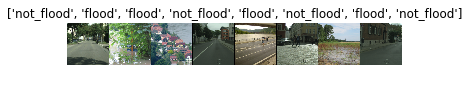

Prediction:


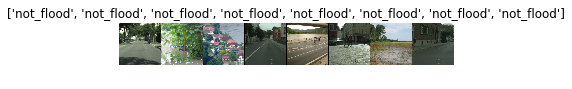

In [14]:
visualize_model(vgg16_trained, test_data)

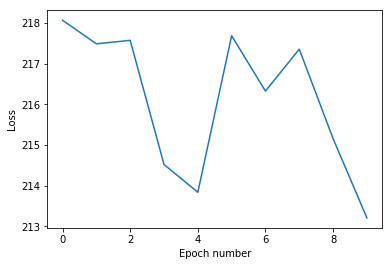

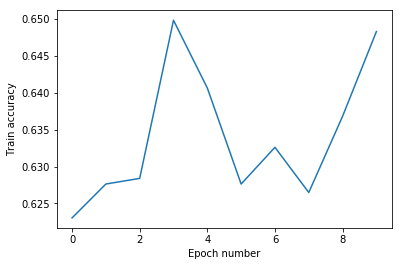

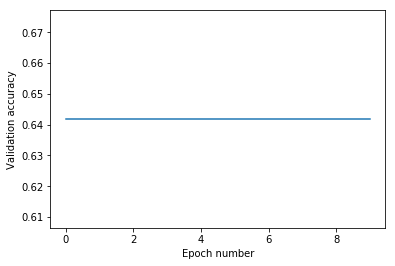

<Figure size 432x288 with 0 Axes>

In [21]:
# graph loss curve
plt.plot(np.arange(10), loss_hist)
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.show()
plt.savefig('loss_curve.png')

#graph train accuracy
plt.plot(np.arange(10), train_acc_hist)
plt.xlabel('Epoch number')
plt.ylabel('Train accuracy')
plt.show()
plt.savefig('train_acc_curve.png')

plt.plot(np.arange(10), val_acc_hist)
plt.xlabel('Epoch number')
plt.ylabel('Validation accuracy')
plt.show()
plt.savefig('val_acc_curve.png')

In [ ]:
model = torch.load('itried.pt')